# Frequency analysis - SumOverDiff

## Step 1. Find nitrogenous base frequencies

In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq

os.chdir('/home/ubuntu/data')

intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    cutoff = 500
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    
    intr_seqs.append(my_intr_seq)
    
    depl_seqs.append(my_depl_seq)

    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [2]:
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [3]:
kmer = 1

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


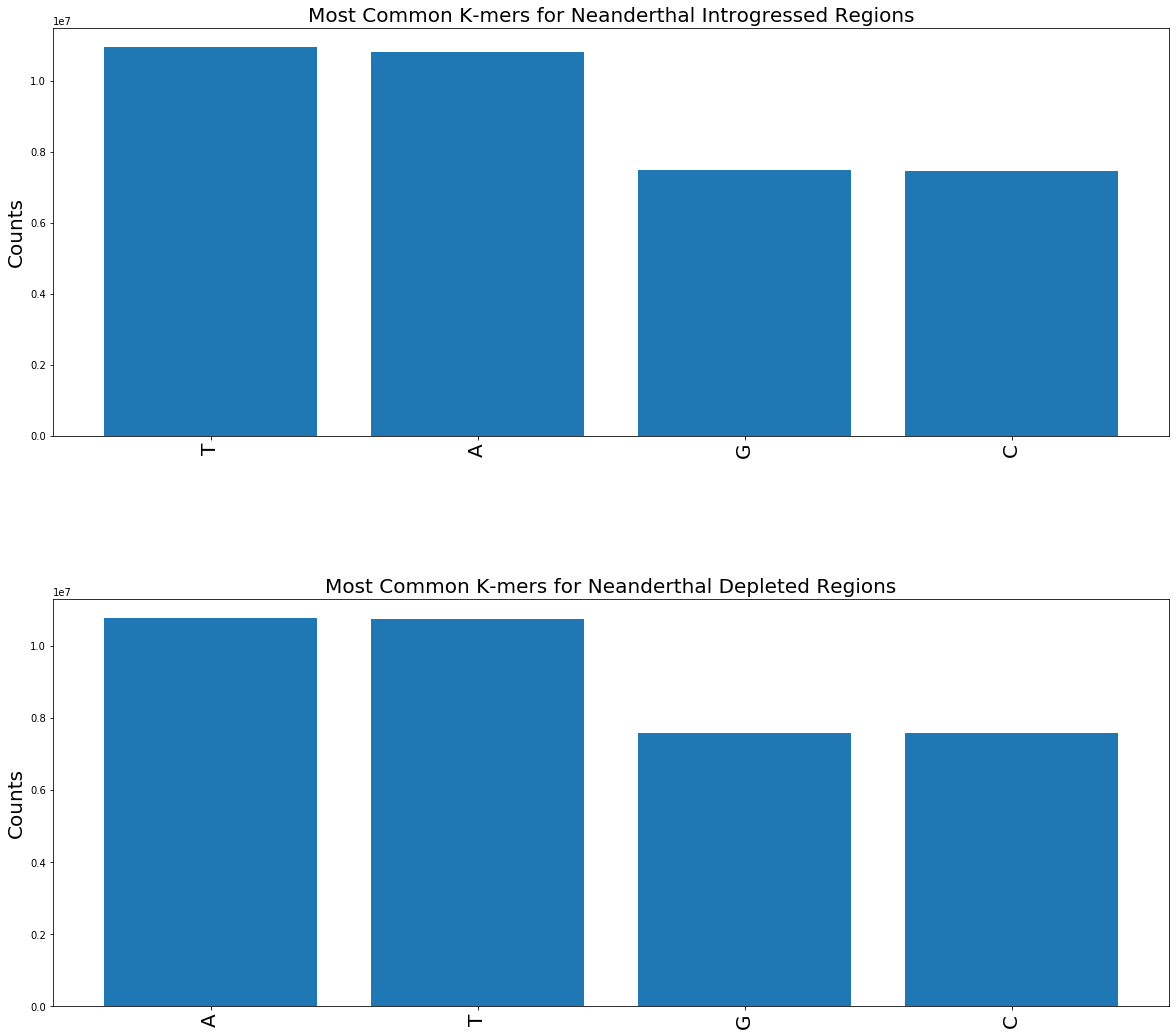

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
D_intr = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_intr)), list(D_intr.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_intr)), list(D_intr.keys()), fontsize = 20)

D_intr_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))

plt.subplot(2, 1, 2)
D_depl = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_depl)), list(D_depl.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_depl)), list(D_depl.keys()), fontsize = 20)

D_depl_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))
               
plt.show()

## Step 2. Find the most predictive words based on frequency

In [5]:
kmer = 5

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


In [6]:
import pandas as pd

intr_counts = dict(Counter([item for sublist in intr_sentences for item in sublist]))
kmers = list(intr_counts.keys())
counts = list(intr_counts.values())
intr_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
intr_df = intr_df.sort_values(['Count'], ascending = False)
intr_df.head(10)

,Kmer,Count
188,TTTTT,243816
332,AAAAA,204235
145,ATTTT,148726
549,AAAAT,145161
653,TATTT,125705
189,TTTTA,124253
429,TAAAA,120031
736,AAATA,119711
147,TTTCT,119003
384,AGAAA,115151


In [7]:
depl_counts = dict(Counter([item for sublist in depl_sentences for item in sublist]))
kmers = list(depl_counts.keys())
counts = list(depl_counts.values())
depl_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
depl_df = depl_df.sort_values(['Count'], ascending = False)
depl_df.head(10)

,Kmer,Count
652,AAAAA,248644
111,TTTTT,242653
102,AAAAT,145922
110,ATTTT,143546
534,AAATA,120383
475,TAAAA,119870
545,TATTT,119721
243,TTTTA,118676
77,AGAAA,114373
33,TTTCT,113512


In [8]:
import numpy as np

merge_df = pd.merge(intr_df, depl_df, on = 'Kmer')
merge_df.columns = ['Kmer','Count_Intr','Count_Depl']
merge_df['Odds_Depl2Intr'] = merge_df['Count_Depl'] / merge_df['Count_Intr']
merge_df['Sum_over_SqrtDifference'] = (merge_df['Count_Depl'] - merge_df['Count_Intr']) / (np.sqrt(merge_df['Count_Depl']) + np.sqrt(merge_df['Count_Intr']))
merge_df['Sum_over_difference'] = (merge_df['Count_Depl'] - merge_df['Count_Intr']) / (merge_df['Count_Depl'] + merge_df['Count_Intr'])
sorted_merge_df = merge_df.sort_values(['Sum_over_difference'], ascending = False)
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['Sum_over_difference'])
sorted_merge_df.head(10)

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr,Sum_over_SqrtDifference,Sum_over_difference,PredictPower
1015,CCGCG,1996,3237,1.621743,12.218024,0.237149,0.237149
1014,CGCGC,2266,3619,1.597087,12.555604,0.229907,0.229907
863,GCGCC,5870,8698,1.481772,16.647144,0.194124,0.194124
1017,CGGCG,1907,2706,1.418983,8.350016,0.173206,0.173206
830,CGGCC,6872,9678,1.408324,15.479299,0.169547,0.169547
1021,TCGCG,1124,1574,1.400356,6.147560,0.166790,0.166790
1016,CGCCG,1947,2713,1.393426,7.961644,0.164378,0.164378
810,GGGCG,7811,10880,1.392907,15.927377,0.164197,0.164197
816,CGCCC,7566,10511,1.389241,15.540411,0.162914,0.162914
1013,CGCGG,2367,3286,1.388255,8.671818,0.162569,0.162569


In [9]:
sorted_merge_df = merge_df.sort_values(['Sum_over_difference'], ascending = False)
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['Sum_over_difference'])
sorted_merge_df.head(15)

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr,Sum_over_SqrtDifference,Sum_over_difference,PredictPower
1015,CCGCG,1996,3237,1.621743,12.218024,0.237149,0.237149
1014,CGCGC,2266,3619,1.597087,12.555604,0.229907,0.229907
863,GCGCC,5870,8698,1.481772,16.647144,0.194124,0.194124
1017,CGGCG,1907,2706,1.418983,8.350016,0.173206,0.173206
830,CGGCC,6872,9678,1.408324,15.479299,0.169547,0.169547
1021,TCGCG,1124,1574,1.400356,6.147560,0.166790,0.166790
1016,CGCCG,1947,2713,1.393426,7.961644,0.164378,0.164378
810,GGGCG,7811,10880,1.392907,15.927377,0.164197,0.164197
816,CGCCC,7566,10511,1.389241,15.540411,0.162914,0.162914
1013,CGCGG,2367,3286,1.388255,8.671818,0.162569,0.162569


In [10]:
import numpy as np

#freq_intr = sorted_merge_df["Count_Intr"]/sum(list(intr_counts.values()))
#freq_depl = sorted_merge_df["Count_Depl"]/sum(list(depl_counts.values()))

n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:n])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][0:n])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][0:n]/sum(sorted_merge_df["Count_Intr"][0:n]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][0:n]/sum(sorted_merge_df["Count_Depl"][0:n]))
print(rel_freq_depl)

0.002010797684018355
0.0028131381129181754
[0.02727894 0.03096898 0.08022414 0.02606259 0.09391827 0.01536149
 0.02660927 0.1067514  0.10340303 0.03234932 0.12621293 0.08760421
 0.09014623 0.09823698 0.05487222]
[0.03162183 0.03535354 0.08496962 0.02643456 0.09454311 0.0153762
 0.02650294 0.10628529 0.10268058 0.0321005  0.12481683 0.08501846
 0.08722623 0.0944845  0.05258582]


## Step 3. Build the DNA based on the frequencies

In [11]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

Idea:
- scelgo la lunghezza complessiva della sequenza di DNA
- genero le parole importanti nel giusto numero
- genero le restanti parole random in modo da arrivare al numero scelto inizialmente
- faccio uno shuffle tenendo fisso il numero di parole

In [12]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [13]:
DNA_imp_intr

['GGCGC',
 'CGCCC',
 'CGGGC',
 'CGCCC',
 'GCGCC',
 'CGCGG',
 'CGCGG',
 'GATCG',
 'GGGCG',
 'GGCGC',
 'CGGCC',
 'GGGCG',
 'CGCGC',
 'CGGGC',
 'CGCCC',
 'GGCGG',
 'GGGCG',
 'CGGGC',
 'GGCGG',
 'CGCCC',
 'GCGCC',
 'CGGGC',
 'CGCCC',
 'GATCG',
 'CGGGC',
 'CGCCC',
 'GGCGG',
 'CGGGC',
 'GCGCC',
 'GGCGC',
 'GATCG',
 'CGCCC',
 'GGCGC',
 'GATCG',
 'CGGCC',
 'GATCG',
 'CGCCC',
 'CGCCC',
 'GGCGC',
 'CGGCC',
 'GGCGG',
 'GGGCG',
 'GGCGT',
 'GGGCG',
 'GGCGG',
 'GGCGT',
 'CGGCG',
 'CGCCC',
 'CGGGC',
 'GGGCG',
 'GGGCG',
 'CGCCC',
 'CGGCC',
 'GGCGT',
 'GGGCG',
 'GGCGG',
 'GGCGC',
 'GGCGG',
 'CGGCC',
 'GGCGT',
 'CGGGC',
 'GCGCC',
 'CGGCC',
 'GGCGC',
 'CGCGG',
 'GGCGC',
 'CGCCC',
 'GGCGG',
 'GGCGG',
 'CGCCC',
 'GGCGT',
 'GGCGG',
 'GGGCG',
 'GGGCG',
 'GATCG',
 'GATCG',
 'CGGCG',
 'CGGCC',
 'GCGCC',
 'GCGCC',
 'GGCGC',
 'CGGGC',
 'GGCGC',
 'CGCGC',
 'GGCGG',
 'GGCGT',
 'GGCGC',
 'CGCCC',
 'GGCGC',
 'GGGCG',
 'CGGCG',
 'GGCGC',
 'CGGCC',
 'GGCGC',
 'CGGGC',
 'GGCGG',
 'TCGCG',
 'CGCGC',
 'GCGCC',
 'GCGCC',


In [14]:
print(len(DNA_imp_intr), len(DNA_imp_depl))

20107 28131


In [15]:
counter = 0
for n in range(len(DNA_imp_intr)):
    if DNA_imp_intr[n] == "CCGCG":
        counter += 1
        
print(counter)

541


In [16]:
counter = 0
for n in range(len(DNA_imp_depl)):
    if DNA_imp_depl[n] == "CCGCG":
        counter += 1
        
print(counter)

896


In [17]:
DNAc_intr = [None]*int(len_dna/5-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/5-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = ["CCGCG", "CGCGC", "GCGCC", "CGGCG", "CGGCC"]

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(5)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(5)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(5)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(5)

1979893
Finished introgressed


In [18]:
print(len(DNAc_intr))
print(len(DNAc_depl))

1979893
1971869


In [19]:
#DNAc_depl[0:1000]

In [20]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [21]:
#DNA_complete

In [22]:
counter = 0
for n in range(len(DNA_complete)):
    if DNA_complete[n] == "CCGCG":
        counter += 1
        
print(counter)

1439


In [23]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [24]:
print(DNA[0:5])

['GCTTC ACAAT GTAAT CGAAT AACAA TTCTG ACGAG AACGG AATAA TTAGT GTTAT GTGGG GACAT AGGCA CGTGC TTGAA AAGTA TGGGA GTCTA CCTCC TTATA CATGA AGAAT CAAAT ACAAC TATTG GTTAG TAATA AACTG ACAAT TAATA GCGAG GCGAG GGCGT CATAG TATAT CAACG AGAAC GAACC GAATC GGGTC ACGCC CTTCC GCTAT AACAA GGCAA TACTC ACATG TAGTG TTTTA ACCTT AAAAT AAAAT AGCCT TGGCA TGCAT CCTTT ACGTG TTTGT AGCGC CGAGT CGGCC CGCCA AGCAT AGGGG CCGTC TGAGT AAGGA CCGTG TGAGC TGTTT GATTT ATTTC ACTGG TAAAA TTATT ACTAG AAAGA GTGGA TCGAA CACAG AGTGC ATTTT CCTCC TAAGG GTCAT CTTGC TAGTA TTAAT GATGG AGAGA TCTAG TATGC CACGT AGAGT AAGCT GCCAA GGGTC TGATA TAGTA ', 'ATAGC TGCCT TCTCC GCACG TGACT GTCTG GATCG GGTTA CGTGG GAAGA AACTA ATCTG TGCAA TGCAC AGCAG AAAGA TGTCA GCTTT CTAAT CACTC ACTCC CACGA CTAGG TGAAA TTCGA CATCC AGGAC GACGT CAAGT ATCGC TATTG TTTCC ACCAG TGAGC ACCTT CGCAA TTTAT GGACC TAAAT GATTT CTCAC AATCA AGGAA CTGAA CTAGA GCGTT ATCCA GGCAC TCAAA CCCAG TAACT AATTC AGGTC TTATG GCAAT AAACT TGTAT GTTAG TTGAA GTTTG TGGGA GAGCG CAAGC ACTTA GTTAT TTAT

In [25]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [26]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

40000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


## Step 4. LSTM 

In [27]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)
#X = tokenizer.texts_to_matrix(merge_texts, mode = 'freq')

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[602 135  55 ... 926 116 147]
 [465 588 524 ... 366 329 905]
 [560 559 246 ... 950 914 126]
 ...
 [460 114 487 ... 594 570 515]
 [199  62 522 ... 125 795 186]
 [474  87 716 ... 336  95 255]]


(40000, 100)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [30]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(32000, 100)
(8000, 100)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
1025


In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 10)) #dropout = 0.2 #input_length = max_length
#model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(LSTM(10)) #dropout = 0.2, recurrent_dropout = 0.2
model.add(Bidirectional(LSTM(10))) #dropout = 0.2, recurrent_dropout = 0.2
#model.add(Bidirectional(SimpleRNN(10)))
#model.add(GRU(10))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))
#model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.0001), metrics = ['accuracy'])
#checkpoint = ModelCheckpoint("weights.best.hdf5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          10250     
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 12,151
Trainable params: 12,151
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)
                    #callbacks = [checkpoint])

Train on 25600 samples, validate on 6400 samples
Epoch 1/5
25600/25600 [==============================] - 28s 1ms/sample - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 2/5
25600/25600 [==============================] - 17s 679us/sample - loss: 0.6919 - accuracy: 0.5227 - val_loss: 0.6947 - val_accuracy: 0.4978
Epoch 3/5
25600/25600 [==============================] - 21s 840us/sample - loss: 0.6790 - accuracy: 0.5709 - val_loss: 0.7045 - val_accuracy: 0.5038
Epoch 4/5
25600/25600 [==============================] - 21s 833us/sample - loss: 0.6655 - accuracy: 0.6013 - val_loss: 0.7182 - val_accuracy: 0.5088
Epoch 5/5
25600/25600 [==============================] - 23s 888us/sample - loss: 0.6532 - accuracy: 0.6186 - val_loss: 0.7206 - val_accuracy: 0.5077


Confusion matrix:
 [[2105 1881]
 [1962 2052]]


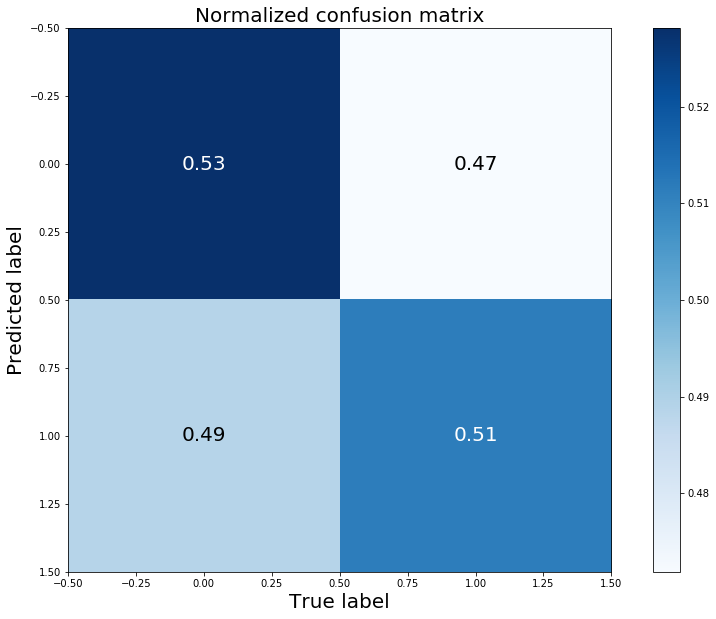

In [35]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [36]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 51.96%


## Different importance

In [37]:
n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:n])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][0:n])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][0:n]/sum(sorted_merge_df["Count_Intr"][0:n]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][0:n]/sum(sorted_merge_df["Count_Depl"][0:n]))
print(rel_freq_depl)

0.002010797684018355
0.0028131381129181754
[0.02727894 0.03096898 0.08022414 0.02606259 0.09391827 0.01536149
 0.02660927 0.1067514  0.10340303 0.03234932 0.12621293 0.08760421
 0.09014623 0.09823698 0.05487222]
[0.03162183 0.03535354 0.08496962 0.02643456 0.09454311 0.0153762
 0.02650294 0.10628529 0.10268058 0.0321005  0.12481683 0.08501846
 0.08722623 0.0944845  0.05258582]


In [38]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

In [39]:
print(list(sorted_merge_df['Kmer'][0:15]))

['CCGCG', 'CGCGC', 'GCGCC', 'CGGCG', 'CGGCC', 'TCGCG', 'CGCCG', 'GGGCG', 'CGCCC', 'CGCGG', 'GGCGG', 'GGCGC', 'GGCGT', 'CGGGC', 'GATCG']


In [40]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [41]:
DNAc_intr = [None]*int(len_dna/5-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/5-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = list(sorted_merge_df['Kmer'][0:15])

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(5)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(5)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(5)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(5)

1979893
Finished introgressed


In [42]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [43]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [44]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [45]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [46]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

40000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)
#X = tokenizer.texts_to_matrix(merge_texts, mode = 'freq')

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[674 941 401 ... 390 435 114]
 [515 300 366 ...  18 653 168]
 [857 639 473 ... 302 602 549]
 ...
 [ 62 805 734 ... 409 566 664]
 [ 20  64 526 ... 238 815 480]
 [ 60 199 123 ... 724 239  47]]


(40000, 100)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [49]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(32000, 100)
(8000, 100)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
1025


In [52]:
model = Sequential()
model.add(Embedding(vocab_size, 10)) #dropout = 0.2 #input_length = max_length
#model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(LSTM(10)) #dropout = 0.2, recurrent_dropout = 0.2
model.add(Bidirectional(LSTM(10))) #dropout = 0.2, recurrent_dropout = 0.2
#model.add(Bidirectional(SimpleRNN(10)))
#model.add(GRU(10))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))
#model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.0001), metrics = ['accuracy'])
#checkpoint = ModelCheckpoint("/home/ubuntu/Ragu/weights.best.hdf5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          10250     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                1680      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 12,151
Trainable params: 12,151
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)
                    #callbacks = [checkpoint])

Train on 25600 samples, validate on 6400 samples
Epoch 1/5
25600/25600 [==============================] - 26s 1ms/sample - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5006
Epoch 2/5
25600/25600 [==============================] - 21s 827us/sample - loss: 0.6903 - accuracy: 0.5362 - val_loss: 0.6944 - val_accuracy: 0.5078
Epoch 3/5
25600/25600 [==============================] - 21s 821us/sample - loss: 0.6759 - accuracy: 0.5767 - val_loss: 0.6998 - val_accuracy: 0.5150
Epoch 4/5
25600/25600 [==============================] - 19s 727us/sample - loss: 0.6598 - accuracy: 0.6076 - val_loss: 0.7106 - val_accuracy: 0.5250
Epoch 5/5
25600/25600 [==============================] - 22s 870us/sample - loss: 0.6424 - accuracy: 0.6325 - val_loss: 0.7218 - val_accuracy: 0.5261


Confusion matrix:
 [[2311 1675]
 [2079 1935]]


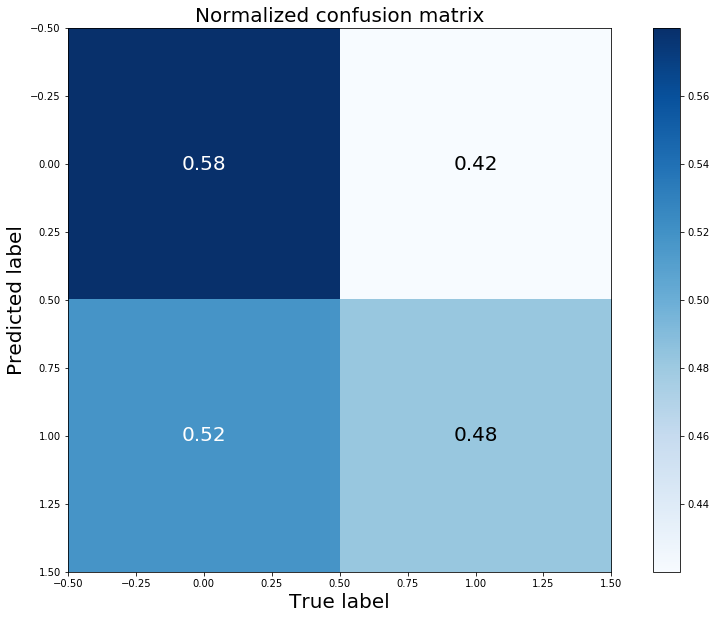

In [54]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [55]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 53.07%


## Most frequent introgressed

In [56]:
n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:]/sum(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:]/sum(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:]))
print(rel_freq_depl)

0.00819458453737528
0.00751557962857761
[0.11145616 0.02882735 0.13703389 0.01301524 0.06949284 0.02139918
 0.15976109 0.09004356 0.10979278 0.08839025 0.12083611 0.00987293
 0.01338748 0.0099836  0.01670752]
[0.11264768 0.02913182 0.13847397 0.01313437 0.07003412 0.02145304
 0.15959061 0.08980514 0.10948841 0.08811947 0.11967559 0.00973011
 0.01316728 0.00960579 0.01594261]


In [57]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

In [58]:
print(list(sorted_merge_df['Kmer'][0:15]))

['CCGCG', 'CGCGC', 'GCGCC', 'CGGCG', 'CGGCC', 'TCGCG', 'CGCCG', 'GGGCG', 'CGCCC', 'CGCGG', 'GGCGG', 'GGCGC', 'GGCGT', 'CGGGC', 'GATCG']


In [59]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [60]:
DNAc_intr = [None]*int(len_dna/5-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/5-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = list(sorted_merge_df['Kmer'][0:15])

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(5)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(5)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(5)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(5)

1918055
Finished introgressed


In [61]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [62]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

2000000
2000000
4000000


In [63]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [64]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [65]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

40000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)
#X = tokenizer.texts_to_matrix(merge_texts, mode = 'freq')

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[ 49 441 779 ... 187 323  14]
 [821 168   8 ... 508  11 601]
 [379 955 890 ... 181 126 297]
 ...
 [479   2  99 ... 537 882 440]
 [  3 103 441 ... 141  21 766]
 [527 213 511 ... 989 164  88]]


(40000, 100)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [68]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(32000, 100)
(8000, 100)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
1025


In [71]:
model = Sequential()
model.add(Embedding(vocab_size, 10)) #dropout = 0.2 #input_length = max_length
#model.add(Conv1D(filters = 16, kernel_size = 5, padding = 'same', activation = 'relu'))
#model.add(MaxPooling1D(pool_size = 2))
#model.add(LSTM(10)) #dropout = 0.2, recurrent_dropout = 0.2
model.add(Bidirectional(LSTM(10))) #dropout = 0.2, recurrent_dropout = 0.2
#model.add(Bidirectional(SimpleRNN(10)))
#model.add(GRU(10))
#model.add(SimpleRNN(10, dropout = 0.2, recurrent_dropout = 0.2))
#model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
#model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.0001), metrics = ['accuracy'])
#checkpoint = ModelCheckpoint("/home/ubuntu/Ragu/weights.best.hdf5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 10)          10250     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20)                1680      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 12,151
Trainable params: 12,151
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)
                    #callbacks = [checkpoint])

Train on 25600 samples, validate on 6400 samples
Epoch 1/5
25600/25600 [==============================] - 23s 907us/sample - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 2/5
25600/25600 [==============================] - 23s 894us/sample - loss: 0.6908 - accuracy: 0.5295 - val_loss: 0.6945 - val_accuracy: 0.5056
Epoch 3/5
25600/25600 [==============================] - 17s 654us/sample - loss: 0.6749 - accuracy: 0.5783 - val_loss: 0.7119 - val_accuracy: 0.5072
Epoch 4/5
25600/25600 [==============================] - 19s 742us/sample - loss: 0.6604 - accuracy: 0.6038 - val_loss: 0.7154 - val_accuracy: 0.5063
Epoch 5/5
25600/25600 [==============================] - 20s 791us/sample - loss: 0.6501 - accuracy: 0.6224 - val_loss: 0.7297 - val_accuracy: 0.5047


Confusion matrix:
 [[1958 2028]
 [2007 2007]]


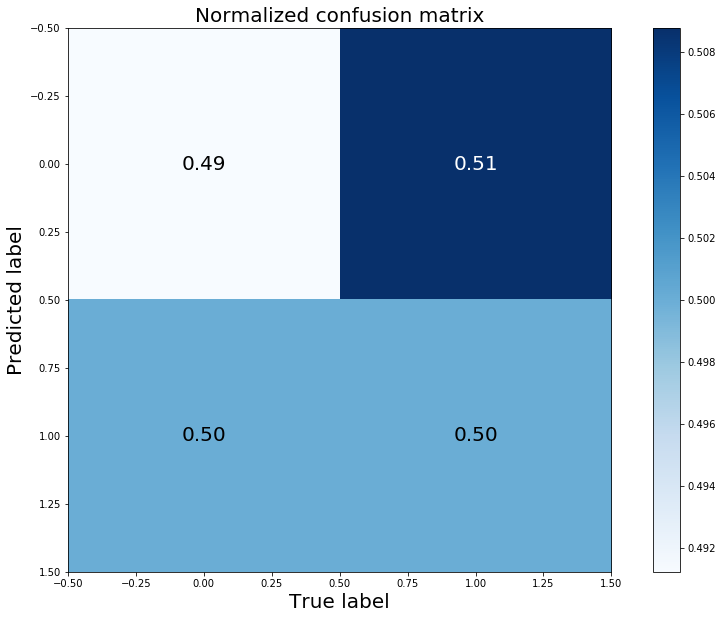

In [73]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [74]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.56%
